# **Brain Tumor Classification:-Glioma,Meningioma, pitutary and No tumor**

**importing necessary libraries.**

* os: For handling file paths.
* numpy: For numerical computations and array handling.
* tensorflow: The deep learning framework for model building.
* ImageDataGenerator: To preprocess and augment images.
* Sequential: A Keras class to build models layer by layer.
* Conv2D, MaxPooling2D: Layers for convolution and pooling in a CNN.
* Flatten, Dense: Layers for fully connected neural networks.
* Dropout: For regularization to prevent overfitting.
* Adam: Optimizer for gradient descent.
* matplotlib.pyplot: For visualizing training metrics.





In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, GlobalAveragePooling2D ,BatchNormalization # Global AveragePooling is used in case of flattening.
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Testing'
if os.path.exists(path):
    print("Path exists!")
else:
    print("Path does NOT exist!")

Path exists!


Defining paths to the dataset

In [ ]:
test_dir = '/content/drive/MyDrive/Testing'
train_dir = '/content/drive/MyDrive/Training'

Data preprocessing and Augumentation
1. ImageDataGenerator: Preprocesses and augments images.
    * rescale: Normalizes pixel values to the range [0, 1].

    * Other Parameters: Add random transformations (rotation, zoom, etc.) to make the model more robust.

    * validation_split=0.2: Splits the training data into 80% training and 20% validation.
    
    * subset='training' and subset='validation': Generate training and validation subsets.


2. flow_from_directory: Loads images directly from the directory and
   organizes them into batches for training, validation, and testing.

   * target_size: Resizes images to 128x128 pixels.

   * class_mode: Sets the classification mode (binary for binary classification).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation for Training and Validation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,           # Normalize pixel values (0-1)
    rotation_range=20,           # Rotate images up to 20 degrees
    width_shift_range=0.2,       # Horizontal shift by 20% of width
    height_shift_range=0.2,      # Vertical shift by 20% of height
    zoom_range=0.2,              # Random zoom up to 20%
    horizontal_flip=True,        # Randomly flip images horizontally
    validation_split=0.2,        # 80% training, 20% validation
    fill_mode='nearest'          # Fill empty spaces with nearest pixels
)

# Testing data preparation (only rescaling, no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load Training Data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=64,                  # Increased batch size for efficiency
    class_mode='categorical',       # Multi-class classification
    subset='training',              # Training data split
    seed=42                         # Ensures consistency in split
)

# Load Validation Data
val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical',
    subset='validation',            # Validation data split
    seed=42                         # Ensures consistency in split
)

# Load Testing Data
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical',
    shuffle=False                   # No shuffling for test data to maintain order
)



Found 4595 images belonging to 4 classes.
Found 1147 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
# Step 5: Build the CNN Model
from tensorflow.keras import models, layers, optimizers, callbacks

# Model Architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),               # Added dropout to reduce overfitting
    layers.Dense(4, activation='softmax')  # Assuming 4 output classes
])


In [ ]:
# Step 6: Compile the Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),   # Optimal LR for stability and changed learning rate from 0.0001 to 0.001
    loss='categorical_crossentropy',                   # For multi-class classification
    metrics=['accuracy']
)




In [40]:
# Step 7: Train the Model
history = model.fit(
    train_data,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    validation_steps=len(val_data),
    epochs=60,                   # Increased to 60 for better learning
)


Epoch 1/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 46s 637ms/step - accuracy: 0.8963 - loss: 0.3121 - val_accuracy: 0.5972 - val_loss: 1.5073
Epoch 2/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 80s 613ms/step - accuracy: 0.8835 - loss: 0.3182 - val_accuracy: 0.3854 - val_loss: 8.1131
Epoch 3/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 45s 624ms/step - accuracy: 0.8953 - loss: 0.2988 - val_accuracy: 0.7890 - val_loss: 0.6862
Epoch 4/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 44s 612ms/step - accuracy: 0.9071 - loss: 0.2737 - val_accuracy: 0.6460 - val_loss: 3.8493
Epoch 5/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 46s 639ms/step - accuracy: 0.9094 - loss: 0.2813 - val_accuracy: 0.7690 - val_loss: 0.7093
Epoch 6/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 44s 617ms/step - accuracy: 0.9070 - loss: 0.2930 - val_accuracy: 0.6853 - val_loss: 1.9019
Epoch 7/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 83s 630ms/step - accuracy: 0.9126 - loss: 0.2599 - val_accuracy: 0.5597 - val_loss: 2.3382
Epoch 8/60
72/72 ━━━━━━━━━━━━━━━━━━━━ 44s 619ms/step - accuracy: 0.9264 - loss: 0.2189 - val_accu

In [41]:
y_train_pred = model.predict(train_data)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_train_true = train_data.classes

print("\nTraining Data Classification Report:")
print(classification_report(y_train_true, y_train_pred_classes, target_names=train_data.class_indices.keys()))



72/72 ━━━━━━━━━━━━━━━━━━━━ 35s 483ms/step

Training Data Classification Report:
              precision    recall  f1-score   support

    No tumor       0.28      0.28      0.28      1292
      glioma       0.23      0.23      0.23      1065
  meningioma       0.23      0.24      0.24      1072
   pituitary       0.26      0.25      0.25      1166

    accuracy                           0.25      4595
   macro avg       0.25      0.25      0.25      4595
weighted avg       0.25      0.25      0.25      4595



In [42]:
y_val_pred = model.predict(val_data)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true = val_data.classes

print("\nValidation Data Classification Report:")
print(classification_report(y_val_true, y_val_pred_classes, target_names=val_data.class_indices.keys()))


18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 541ms/step

Validation Data Classification Report:
              precision    recall  f1-score   support

    No tumor       0.33      0.32      0.32       323
      glioma       0.23      0.21      0.22       266
  meningioma       0.25      0.30      0.27       267
   pituitary       0.27      0.26      0.27       291

    accuracy                           0.27      1147
   macro avg       0.27      0.27      0.27      1147
weighted avg       0.27      0.27      0.27      1147



21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step


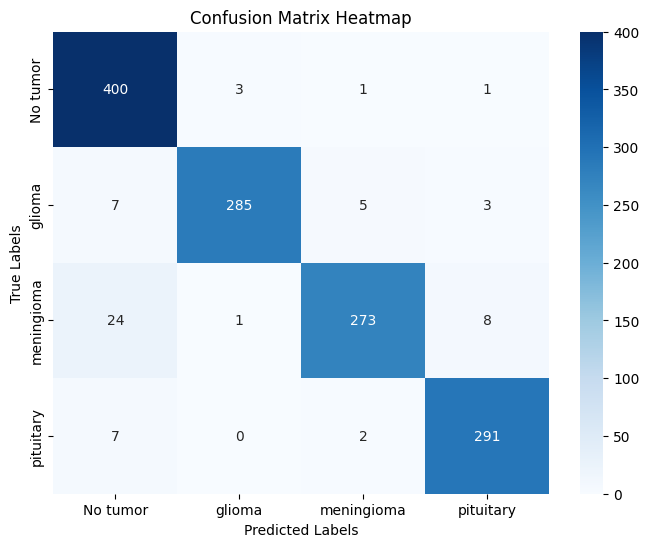


Classification Report test dataset:
              precision    recall  f1-score   support

    No tumor       0.91      0.99      0.95       405
      glioma       0.99      0.95      0.97       300
  meningioma       0.97      0.89      0.93       306
   pituitary       0.96      0.97      0.97       300

    accuracy                           0.95      1311
   macro avg       0.96      0.95      0.95      1311
weighted avg       0.95      0.95      0.95      1311



In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predictions
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = test_data.classes  # Actual class labels

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Heatmap Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("\nClassification Report test dataset:")
print(classification_report(y_true, y_pred_classes, target_names=test_data.class_indices.keys()))

Training Accuracy: 97.50%
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 258ms/step - accuracy: 0.9619 - loss: 0.3036
Test Accuracy: 95.27%


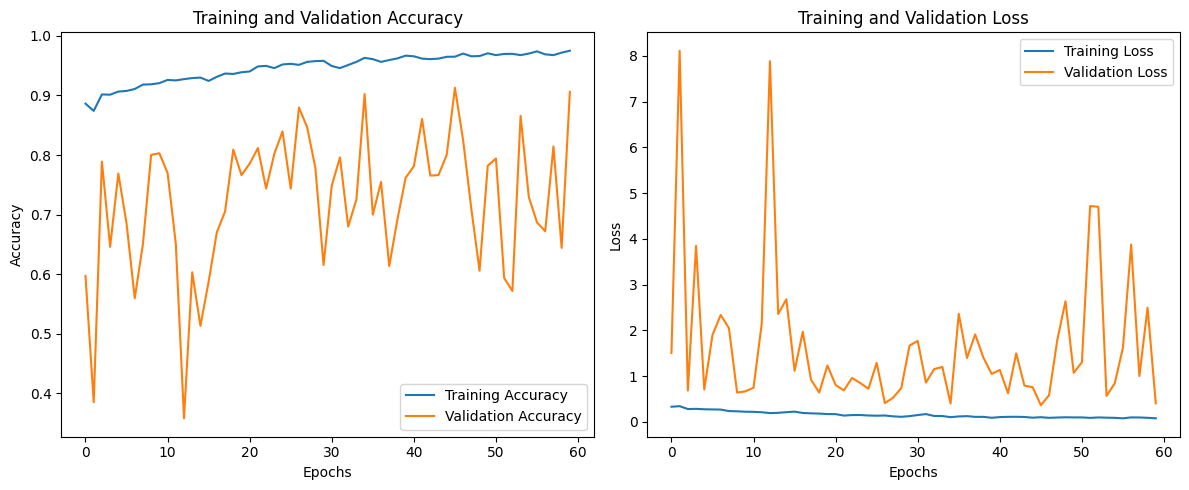

In [44]:
# Step 8: Evaluate the Model
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Model Evaluation on Test Data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plotting Accuracy and Loss Curves
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Tumor Type: pituitary


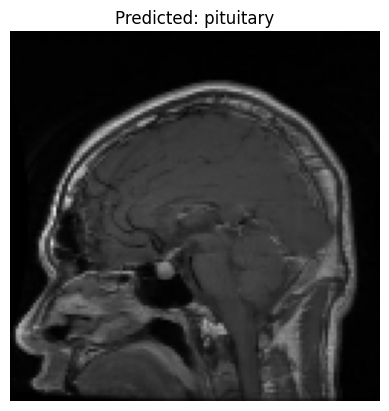

In [45]:
# Step 10: Predict a Sample Image
import cv2
from tensorflow.keras.preprocessing import image

# Load an image from the test set
img_path = '/content/drive/MyDrive/Testing/pituitary/Te-piTr_0006.jpg'  # Change path accordingly
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make Prediction
pred = model.predict(img_array)
pred_class = np.argmax(pred, axis=1)
class_labels = list(train_data.class_indices.keys())
print(f"Predicted Tumor Type: {class_labels[pred_class[0]]}")

# Display Image
plt.imshow(img)
plt.title(f"Predicted: {class_labels[pred_class[0]]}")
plt.axis('off')
plt.show()